# Apple mobility data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_apple = pd.read_csv("apple.csv")

In [16]:
## possible transportation types: driving, walking and transit
transportation_type = "transit"
country = ["Germany", "France", "Austria", "Spain", "Italy", "Croatia", "Poland"]

df_filtered_apple = df_apple[(df_apple.transportation_type==transportation_type) & (df_apple.geo_type=="country/region") & df_apple.region.isin(country)]
df_filtered_apple = df_filtered_apple.drop(["geo_type", "transportation_type", "alternative_name", "sub-region", "country"], axis=1)
#df_filtered = df_filtered.melt(id_vars="region", var_name=["date"])
df_filtered_apple = df_filtered_apple.pivot_table(columns='region')
df_filtered_apple = df_filtered_apple.fillna(method="ffill")
df_filtered_apple

region,France,Germany,Italy,Spain
2020-01-13,100.00,100.00,100.00,100.00
2020-01-14,100.31,102.85,100.82,98.32
2020-01-15,102.48,102.41,100.40,101.88
2020-01-16,103.75,105.37,99.52,106.29
2020-01-17,106.97,114.32,107.35,120.34
...,...,...,...,...
2020-06-06,71.87,87.81,42.99,41.26
2020-06-07,62.83,83.70,40.90,38.14
2020-06-08,76.41,89.42,42.38,44.85
2020-06-09,80.79,90.40,44.74,46.34


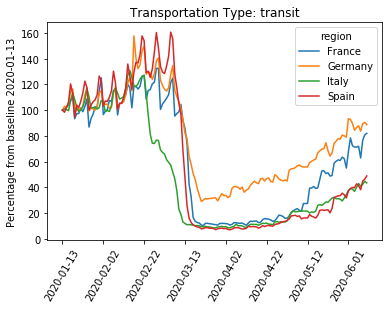

In [20]:
df_filtered_apple.plot(kind='line', x_compat=True)
plt.xticks(rotation=60)
plt.title("Transportation Type: %s" % transportation_type)
plt.ylabel("Percentage from baseline 2020-01-13")
plt.show()

# Google mobility data

In [5]:
df_google = pd.read_csv("google.csv")

C:\Users\Maxi\.conda\envs\ami\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
## those are all the information types which could be selected
## retail_and_recreation_percent_change_from_baseline/grocery_and_pharmacy_percent_change_from_baseline
## parks_percent_change_from_baseline/transit_stations_percent_change_from_baseline
## workplaces_percent_change_from_baseline/residential_percent_change_from_baseline
information_type = "workplaces_percent_change_from_baseline" 
country = ["Germany", "France", "Austria", "Spain", "Italy", "Croatia", "Poland"]

df_filtered_google = df_google[df_google.country_region.isin(country)]
df_filtered_google = df_filtered_google.drop(["country_region_code", "sub_region_1", "sub_region_2"], axis=1)
df_filtered_google = df_filtered_google[["country_region", "date", information_type]]
#df_filtered = df_filtered.melt(id_vars="region", var_name=["date"])
df_filtered_google = df_filtered_google.pivot_table(values=information_type, index='date', columns='country_region')
df_filtered_google = df_filtered_google.fillna(method="ffill")
df_filtered_google

country_region,Austria,Croatia,France,Germany,Italy,Poland,Spain
date,,,,,,,
2020-02-15,-0.8,0.454545,-1.571429,-0.235294,0.190476,0.764706,-0.05
2020-02-16,0.7,1.954545,-0.785714,-0.823529,0.476190,-2.352941,-0.75
2020-02-17,-2.8,0.045455,-15.214286,-3.705882,0.857143,13.117647,3.90
2020-02-18,-2.6,0.181818,-13.928571,-3.823529,1.238095,-1.352941,3.80
2020-02-19,-3.2,0.181818,-12.000000,-4.117647,0.904762,-2.411765,3.70
...,...,...,...,...,...,...,...
2020-06-03,-22.1,-17.136364,-29.071429,-23.176471,-30.238095,-22.470588,-34.95
2020-06-04,-22.5,-17.545455,-31.000000,-24.470588,-31.857143,-22.058824,-35.90
2020-06-05,-23.3,-18.363636,-29.714286,-23.823529,-31.523810,-16.000000,-32.85


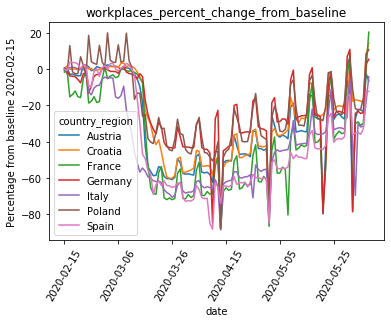

In [7]:
df_filtered_google.plot(x_compat=True)
plt.xticks(rotation=60)
plt.title(information_type)
plt.ylabel("Percentage from baseline 2020-02-15")
plt.show()

# Opensky

In [120]:
from datetime import datetime
import numpy as np

df_opensky_jan = pd.read_csv("opensky/flightlist_20200101_20200131.csv", usecols=["firstseen", "lastseen", "day"])
df_opensky_feb = pd.read_csv("opensky/flightlist_20200201_20200229.csv", usecols=["firstseen", "lastseen", "day"])
df_opensky_mar = pd.read_csv("opensky/flightlist_20200301_20200331.csv", usecols=["firstseen", "lastseen", "day"])
df_opensky_apr = pd.read_csv("opensky/flightlist_20200401_20200430.csv", usecols=["firstseen", "lastseen", "day"])
df_opensky_may = pd.read_csv("opensky/flightlist_20200501_20200531.csv", usecols=["firstseen", "lastseen", "day"])
df_opensky = pd.concat([df_opensky_jan, df_opensky_feb, df_opensky_mar, df_opensky_apr, df_opensky_may])
df_opensky

,firstseen,lastseen,day
0,2019-12-31 00:19:47+00:00,2020-01-01 13:27:28+00:00,2020-01-01 00:00:00+00:00
1,2019-12-31 00:25:26+00:00,2020-01-01 07:48:41+00:00,2020-01-01 00:00:00+00:00
2,2019-12-31 01:08:54+00:00,2020-01-01 01:45:29+00:00,2020-01-01 00:00:00+00:00
3,2019-12-31 01:29:25+00:00,2020-01-01 04:08:28+00:00,2020-01-01 00:00:00+00:00
4,2019-12-31 02:23:05+00:00,2020-01-01 08:52:18+00:00,2020-01-01 00:00:00+00:00
...,...,...,...
324379,2020-05-31 23:37:48+00:00,2020-05-31 23:48:20+00:00,2020-05-31 00:00:00+00:00
324380,2020-05-31 23:39:54+00:00,2020-05-31 23:54:28+00:00,2020-05-31 00:00:00+00:00
324381,2020-05-31 23:40:06+00:00,2020-05-31 23:53:57+00:00,2020-05-31 00:00:00+00:00
324382,2020-05-31 23:43:13+00:00,2020-05-31 23:56:21+00:00,2020-05-31 00:00:00+00:00


In [121]:
# this takes some time!
df_opensky['flight_hours'] = df_opensky.apply(lambda row: 
                                                     (datetime.strptime(row.lastseen, '%Y-%m-%d %H:%M:%S+00:00').timestamp() - 
                                                     datetime.strptime(row.firstseen, '%Y-%m-%d %H:%M:%S+00:00').timestamp())/3600.0, 
                                                     axis = 1)
df_opensky = df_opensky.drop(["firstseen", "lastseen"], axis=1)
df_opensky = df_opensky.fillna(0)

In [122]:
df_opensky = df_opensky.pivot_table(values="flight_hours", index="day", aggfunc=np.sum)
df_opensky

,flight_hours
day,
2020-01-01 00:00:00+00:00,98263.349167
2020-01-02 00:00:00+00:00,105049.598889
2020-01-03 00:00:00+00:00,100210.760833
2020-01-04 00:00:00+00:00,112724.074722
2020-01-05 00:00:00+00:00,113001.671667
...,...
2020-05-27 00:00:00+00:00,24559.623889
2020-05-28 00:00:00+00:00,25370.152500
2020-05-29 00:00:00+00:00,25306.105000


In [132]:
# rename index strings
old_idx = list(df_opensky.index)
new_idx = []
for day in old_idx:
    new_idx.append(datetime.strptime(day, '%Y-%m-%d %H:%M:%S+00:00').date().strftime("%Y-%m-%d"))
df_opensky.index = new_idx

In [133]:
df_opensky.to_csv('opensky_flight_hours.csv')

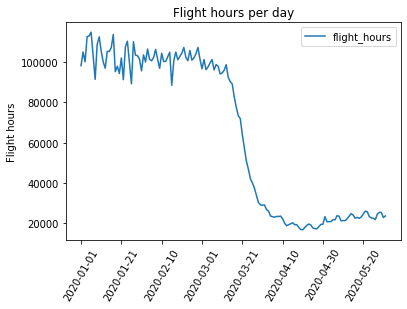

In [134]:
df_opensky.plot(x_compat=True)
plt.xticks(rotation=60)
plt.title("Flight hours per day")
plt.ylabel("Flight hours")
plt.show()

# Flightradar

In [15]:
df_flightradar_commercial = pd.read_csv("flightradar/number-of-commercial-fli.csv", delimiter=';')
df_flightradar_commercial.columns = ["Date", "7d_avg_com", "commercial_flights"]
df_flightradar_total = pd.read_csv("flightradar/total-number-of-flights.csv", delimiter=';')
df_flightradar_total.columns = ["Date", "7d_avg_tot", "total_flights"]

In [17]:
df_flightradar_total["7d_avg_com"]=df_flightradar_commercial[ "7d_avg_com"]
df_flightradar_total["commercial_flights"]=df_flightradar_commercial[ "commercial_flights"]
df_flightradar_total.head()
df_flightradar_total.to_csv (r'flightradar.csv', index = False, header=True)